In [5]:
import glob
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
import numpy as np

from hot_encoding_utils import ice_type, one_hot_m1, one_hot_m2


from scipy.interpolate import RectBivariateSpline

%matplotlib inline

In [2]:
pwd

'C:\\Alissa\\ENSG\\ING2\\STAGE\\Dev\\satellite-data-pipeline\\asip_v2'

In [3]:
%cd "D:/training"

D:\training


In [4]:
ifile = 'D:/training/20190509T081206_S1A_AMSR2_Icechart-Greenland-CentralEast.nc'
ds = nc.Dataset(ifile)

<IPython.core.display.Javascript object>


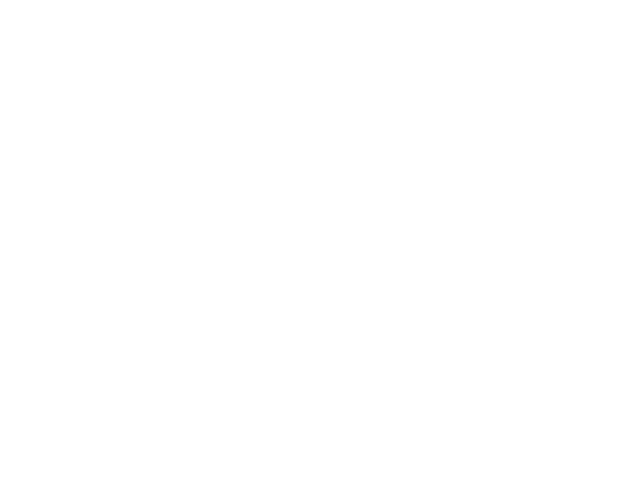

In [5]:
plt.imshow(ds['polygon_icechart'])

In [6]:
np.unique(ds['polygon_icechart'])

masked_array(data=[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
                   --],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False,  True],
       fill_value=0,
            dtype=uint8)

----- input 
 ['41', '92', '-9', '87', '8', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.07999999999999996, 0, 0.92, 0] 

----- input 
 ['42', '92', '30', '91', '8', '70', '87', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['43', '92', '10', '91', '8', '60', '87', '-9', '30', '83', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0.3, 0.7, 0] 

----- input 
 ['44', '50', '20', '93', '5', '20', '91', '5', '10', '87', '4', '98', '-9', '-9', 'I'] 
-----output 
 [0.5, 0, 0.5, 0] 

----- input 
 ['45', '92', '30', '91', '8', '70', '87', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['46', '80', '30', '91', '5', '30', '87', '4', '20', '87', '3', '-9', '-9', '-9', 'I'] 
-----output 
 [0.19999999999999996, 0, 0.8, 0] 

----- input 
 ['47', '80', '20', '93', '6', '20', '91', '5', '40', '87', '4', '-9', '-9', '-9', 'I'] 
-----output 
 [0.19999999999999996, 0, 0.8, 0

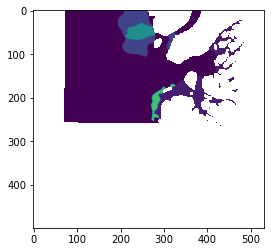

young ice


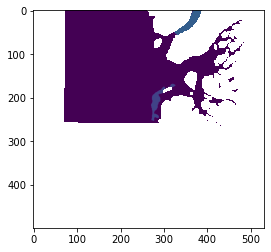

first-year ice


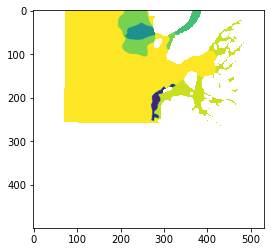

multi-year ice


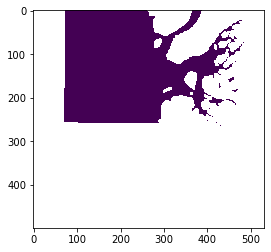

----- input 
 ['33', '92', '-9', '91', '8', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.07999999999999996, 0, 0.92, 0] 

----- input 
 ['35', '92', '-9', '91', '8', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.07999999999999996, 0, 0.92, 0] 

----- input 
 ['36', '92', '-9', '91', '8', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.07999999999999996, 0, 0.92, 0] 

----- input 
 ['38', '70', '10', '98', '10', '40', '87', '3', '20', '83', '2', '-9', '-9', '-9', 'I'] 
-----output 
 [0.3999999999999999, 0.2, 0.4, 0] 

----- input 
 ['39', '30', '10', '95', '3', '10', '93', '4', '10', '91', '2', '-9', '-9', '19', 'I'] 
-----output 
 [0.7, 0, 0.2, 0.1] 

----- input 
 ['40', '92', '-9', '91', '8', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.07999999999999996, 0, 0.92, 0] 

----- input 
 ['41', '92', '-9', '91', '8', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '-

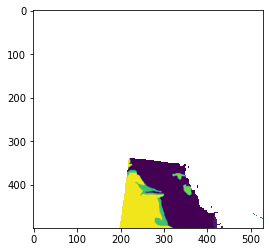

young ice


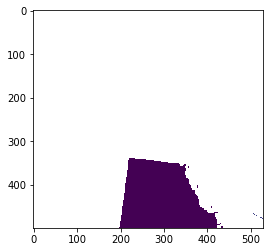

first-year ice


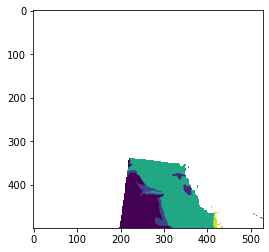

multi-year ice


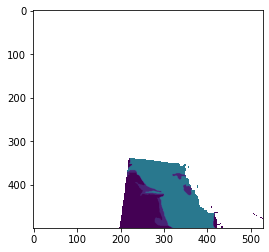

----- input 
 ['1', '40', '10', '87', '3', '30', '83', '2', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.6, 0.3, 0.1, 0] 

----- input 
 ['2', '90', '10', '95', '4', '50', '87', '3', '30', '83', '2', '98', '-9', '-9', 'I'] 
-----output 
 [0.09999999999999998, 0.3, 0.5, 0.1] 

----- input 
 ['3', '91', '20', '95', '4', '50', '87', '3', '30', '83', '2', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0.3, 0.5, 0.2] 

----- input 
 ['13', '20', '10', '87', '3', '10', '83', '2', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.8, 0.1, 0.1, 0] 

----- input 
 ['29', '02', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'W'] 
-----output 
 [0.98, 0, 0, 0] 

20181227T082113_S1B_AMSR2_Icechart-Greenland-CentralEast.nc
open water


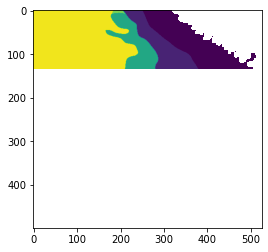

young ice


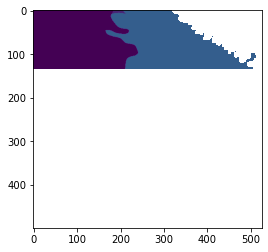

first-year ice


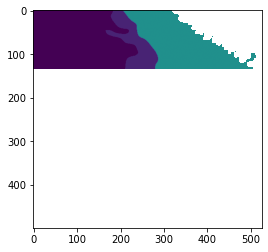

multi-year ice


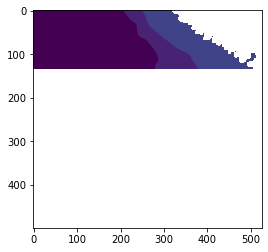

----- input 
 ['10', '92', '30', '91', '8', '70', '87', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['19', '92', '20', '87', '8', '80', '83', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.0, 0.8, 0.2, 0] 

----- input 
 ['20', '92', '20', '87', '8', '70', '83', '-9', '10', '82', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.0, 0.7999999999999999, 0.2, 0] 

----- input 
 ['21', '90', '20', '91', '5', '50', '87', '5', '20', '83', '4', '-9', '-9', '-9', 'I'] 
-----output 
 [0.10000000000000009, 0.2, 0.7, 0] 

----- input 
 ['22', '10', '-9', '87', '4', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '19', 'I'] 
-----output 
 [0.9, 0, 0.1, 0] 

----- input 
 ['23', '92', '20', '87', '8', '70', '83', '-9', '10', '82', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.0, 0.7999999999999999, 0.2, 0] 

----- input 
 ['24', '70', '30', '83', '3', '30', '82', '3', '10', '81', '99', '-9', '-9', '-9', 'I'] 
-----output 
 [0.300000

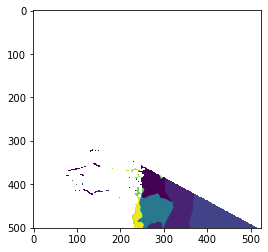

young ice


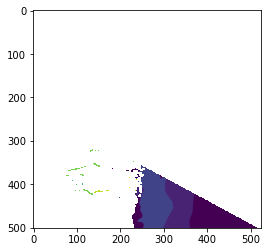

first-year ice


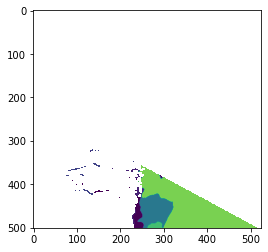

multi-year ice


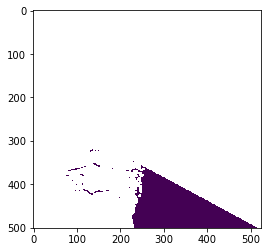

----- input 
 ['8', '92', '20', '98', '8', '80', '91', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.19999999999999996, 0, 0.8, 0] 

----- input 
 ['10', '92', '10', '93', '8', '90', '91', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['11', '92', '70', '91', '8', '30', '87', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['12', '92', '10', '93', '8', '90', '91', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['13', '92', '20', '98', '8', '20', '93', '-9', '60', '91', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.19999999999999996, 0, 0.8, 0] 

----- input 
 ['14', '91', '20', '87', '5', '50', '83', '4', '30', '82', '3', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0.8, 0.2, 0] 

----- input 
 ['15', '91', '80', '91', '7', '20', '87', '6', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input

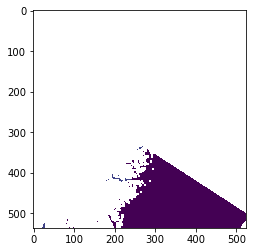

young ice


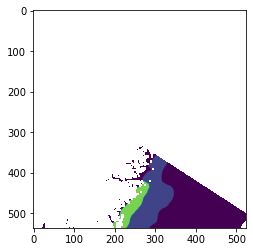

first-year ice


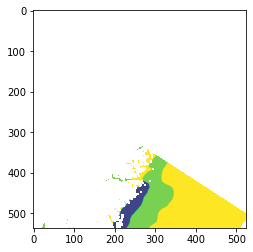

multi-year ice


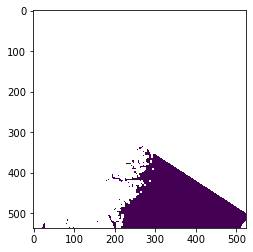

----- input 
 ['1', '20', '10', '95', '4', '10', '87', '3', '-9', '83', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.8, 0, 0.1, 0.1] 

----- input 
 ['2', '92', '20', '95', '8', '60', '91', '-9', '20', '83', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0.2, 0.6, 0.2] 

----- input 
 ['3', '92', '20', '95', '8', '60', '91', '-9', '20', '83', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0.2, 0.6, 0.2] 

----- input 
 ['4', '02', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'W'] 
-----output 
 [0.98, 0, 0, 0] 

----- input 
 ['5', '20', '10', '95', '4', '10', '87', '3', '-9', '83', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.8, 0, 0.1, 0.1] 

----- input 
 ['6', '30', '10', '95', '4', '10', '91', '3', '10', '87', '3', '98', '-9', '19', 'I'] 
-----output 
 [0.7, 0, 0.2, 0.1] 

----- input 
 ['7', '92', '-9', '87', '8', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.07999999999999996, 0, 0.92, 0] 

----- input 
 ['8', '

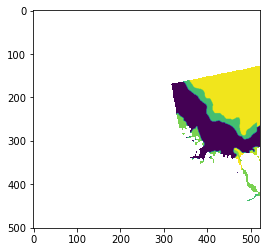

young ice


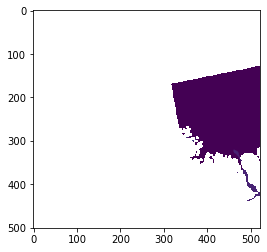

first-year ice


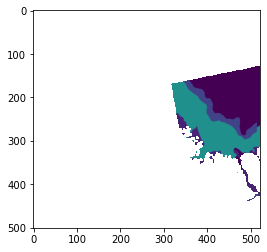

multi-year ice


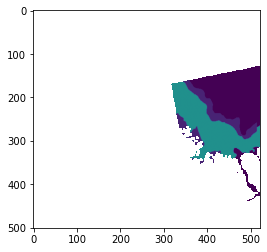

----- input 
 ['23', '92', '20', '98', '8', '70', '93', '-9', '10', '91', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.20000000000000007, 0, 0.7999999999999999, 0] 

----- input 
 ['24', '92', '10', '98', '8', '70', '93', '-9', '20', '91', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.10000000000000009, 0, 0.8999999999999999, 0] 

----- input 
 ['25', '92', '20', '98', '8', '70', '93', '-9', '10', '91', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.20000000000000007, 0, 0.7999999999999999, 0] 

----- input 
 ['26', '92', '30', '98', '8', '60', '93', '-9', '10', '91', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.30000000000000004, 0, 0.7, 0] 

----- input 
 ['27', '91', '20', '95', '6', '50', '93', '6', '30', '91', '5', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 0.8, 0.2] 

----- input 
 ['28', '92', '-9', '93', '8', '-9', '-9', '-9', '-9', '-9', '-9', '95', '-9', '-9', 'I'] 
-----output 
 [0.07999999999999996, 0, 0.92, 0] 

----- input 
 ['29', '92', '50', '95', '8', '40', '9

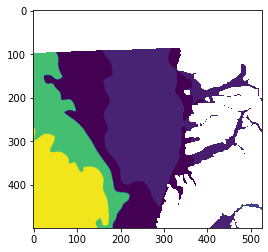

young ice


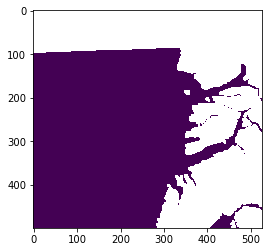

first-year ice


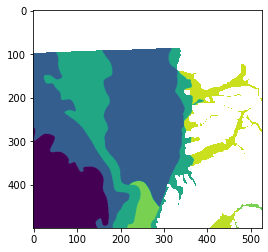

multi-year ice


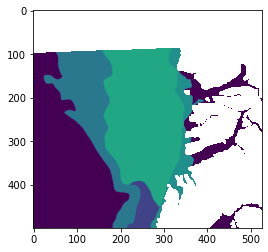

----- input 
 ['1', '20', '10', '93', '4', '10', '91', '4', '-9', '-9', '-9', '95', '-9', '19', 'I'] 
-----output 
 [0.8, 0, 0.2, 0] 

----- input 
 ['2', '92', '60', '93', '8', '40', '91', '-9', '-9', '-9', '-9', '95', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['3', '92', '60', '93', '8', '40', '91', '-9', '-9', '-9', '-9', '95', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['4', '50', '20', '95', '4', '20', '93', '4', '10', '91', '3', '98', '-9', '19', 'I'] 
-----output 
 [0.5, 0, 0.30000000000000004, 0.2] 

----- input 
 ['5', '92', '60', '93', '8', '40', '91', '-9', '-9', '-9', '-9', '95', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['6', '91', '20', '95', '5', '50', '93', '5', '30', '91', '4', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 0.8, 0.2] 

----- input 
 ['7', '92', '60', '93', '8', '40', '91', '-9', '-9', '-9', '-9', '95', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['8', '92', '60', '

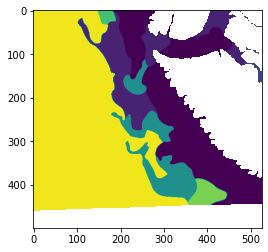

young ice


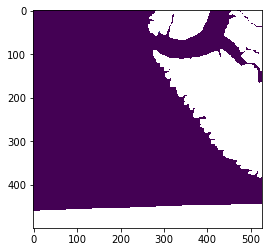

first-year ice


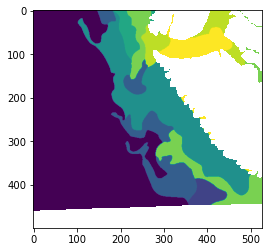

multi-year ice


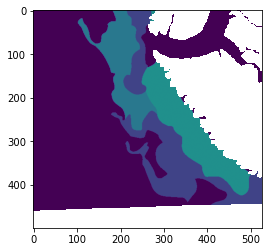

----- input 
 ['1', '91', '40', '91', '8', '60', '87', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 1.0, 0] 

----- input 
 ['2', '80', '30', '95', '4', '30', '93', '3', '20', '91', '3', '98', '-9', '-9', 'I'] 
-----output 
 [0.19999999999999996, 0, 0.5, 0.3] 

----- input 
 ['4', '02', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'W'] 
-----output 
 [0.98, 0, 0, 0] 

----- input 
 ['5', '70', '20', '95', '4', '30', '93', '3', '20', '91', '3', '98', '-9', '-9', 'I'] 
-----output 
 [0.30000000000000004, 0, 0.5, 0.2] 

----- input 
 ['6', '91', '50', '95', '5', '30', '93', '4', '20', '91', '3', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 0.5, 0.5] 

----- input 
 ['7', '80', '10', '98', '10', '30', '95', '4', '40', '93', '4', '-9', '-9', '-9', 'I'] 
-----output 
 [0.30000000000000004, 0, 0.4, 0.3] 

----- input 
 ['8', '50', '20', '98', '10', '10', '95', '4', '20', '91', '4', '-9', '-9', '-9', 'I'] 
-----output 
 [0.7, 0, 0.2, 0.1] 

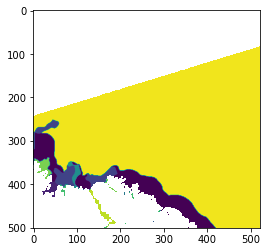

young ice


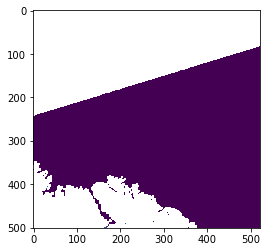

first-year ice


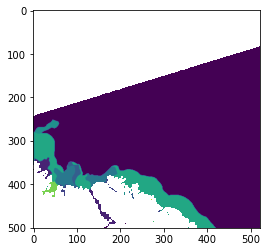

multi-year ice


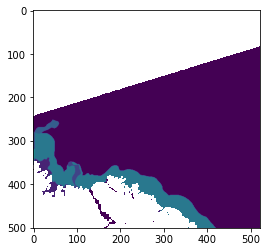

----- input 
 ['30', '30', '20', '98', '10', '10', '87', '3', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.9, 0, 0.1, 0] 

----- input 
 ['32', '91', '70', '98', '10', '30', '83', '2', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.7, 0.3, 0, 0] 

----- input 
 ['36', '91', '40', '95', '5', '50', '93', '6', '10', '91', '4', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 0.6, 0.4] 

----- input 
 ['37', '91', '40', '95', '5', '40', '93', '5', '20', '91', '4', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 0.6000000000000001, 0.4] 

----- input 
 ['38', '20', '10', '93', '4', '10', '91', '3', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.8, 0, 0.2, 0] 

----- input 
 ['39', '02', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'W'] 
-----output 
 [0.98, 0, 0, 0] 

----- input 
 ['40', '02', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'W'] 
-----output 
 [0.98, 0, 0, 0] 

----- input 
 ['41', '90', 

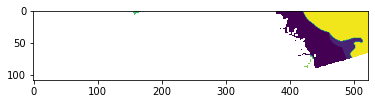

young ice


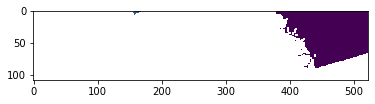

first-year ice


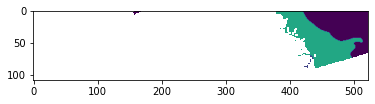

multi-year ice


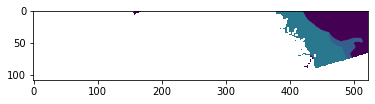

----- input 
 ['1', '80', '20', '98', '10', '20', '91', '3', '40', '87', '2', '98', '-9', '-9', 'I'] 
-----output 
 [0.3999999999999999, 0, 0.6000000000000001, 0] 

----- input 
 ['2', '70', '30', '95', '5', '20', '93', '4', '20', '87', '3', '98', '-9', '-9', 'I'] 
-----output 
 [0.30000000000000004, 0, 0.4, 0.3] 

----- input 
 ['3', '30', '10', '98', '10', '20', '87', '2', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.8, 0, 0.2, 0] 

----- input 
 ['4', '91', '50', '95', '5', '30', '93', '4', '20', '91', '4', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 0.5, 0.5] 

----- input 
 ['5', '92', '10', '95', '8', '60', '91', '-9', '30', '83', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [1.1102230246251565e-16, 0.3, 0.6, 0.1] 

----- input 
 ['6', '91', '50', '98', '10', '30', '91', '3', '20', '87', '3', '-9', '-9', '-9', 'I'] 
-----output 
 [0.5, 0, 0.5, 0] 

----- input 
 ['7', '70', '30', '95', '5', '20', '93', '4', '20', '87', '2', '98', '-9', '-9', 'I'] 
-----output 
 [0

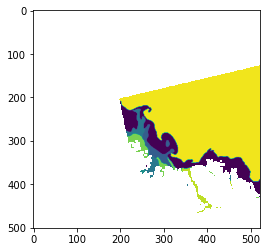

young ice


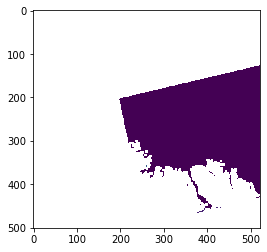

first-year ice


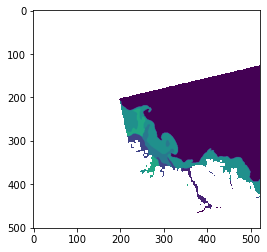

multi-year ice


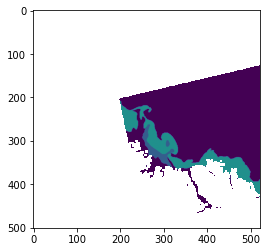

----- input 
 ['1', '10', '-9', '98', '10', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.9, 0, 0, 0] 

----- input 
 ['2', '91', '90', '98', '10', '10', '83', '3', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.9, 0.1, 0, 0] 

----- input 
 ['3', '92', '40', '98', '8', '60', '87', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.4, 0, 0.6, 0] 

----- input 
 ['4', '92', '40', '98', '8', '60', '87', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.4, 0, 0.6, 0] 

----- input 
 ['5', '30', '-9', '98', '10', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.7, 0, 0, 0] 

----- input 
 ['6', '91', '-9', '87', '5', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.08999999999999997, 0, 0.91, 0] 

----- input 
 ['7', '20', '10', '98', '10', '10', '87', '3', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.9, 0, 0.1, 0] 

----- input 
 ['8', '90', '80', '

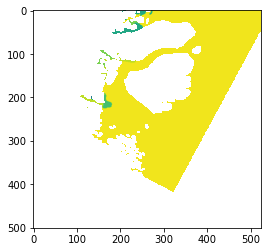

young ice


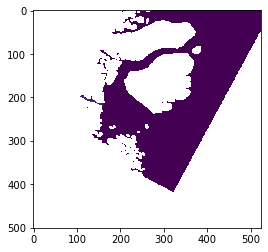

first-year ice


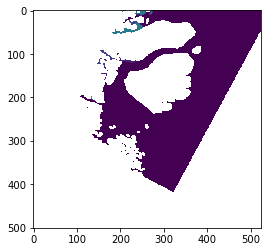

multi-year ice


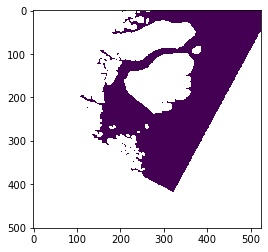

----- input 
 ['1', '30', '20', '95', '2', '10', '93', '2', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.7, 0, 0.1, 0.2] 

----- input 
 ['2', '50', '30', '95', '2', '20', '93', '2', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.5, 0, 0.2, 0.3] 

----- input 
 ['3', '90', '60', '95', '2', '30', '93', '2', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.10000000000000009, 0, 0.3, 0.6] 

----- input 
 ['4', '90', '60', '95', '2', '30', '93', '2', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.10000000000000009, 0, 0.3, 0.6] 

----- input 
 ['5', '1', '-9', '95', '2', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.99, 0, 0, 0.01] 

----- input 
 ['6', '30', '20', '95', '2', '10', '93', '2', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.7, 0, 0.1, 0.2] 

----- input 
 ['7', '1', '-9', '95', '2', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.99, 0, 0, 0.01] 

----- inp

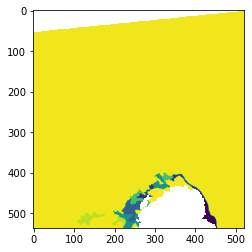

young ice


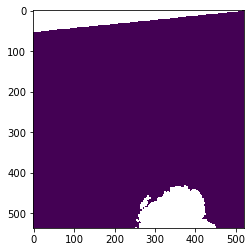

first-year ice


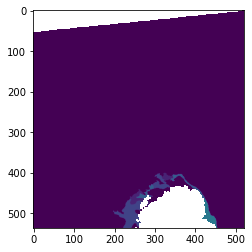

multi-year ice


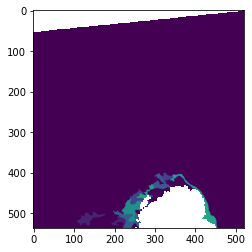

----- input 
 ['11', '10', '-9', '95', '2', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.9, 0, 0, 0.1] 

----- input 
 ['12', '50', '30', '95', '2', '20', '93', '2', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.5, 0, 0.2, 0.3] 

----- input 
 ['13', '10', '-9', '95', '2', '-9', '-9', '-9', '-9', '-9', '-9', '98', '-9', '19', 'I'] 
-----output 
 [0.9, 0, 0, 0.1] 

----- input 
 ['14', '70', '40', '95', '2', '30', '93', '2', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.30000000000000004, 0, 0.3, 0.4] 

----- input 
 ['15', '10', '-9', '98', '9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.9, 0, 0, 0] 

----- input 
 ['16', '70', '-9', '98', '9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', 'I'] 
-----output 
 [0.30000000000000004, 0, 0, 0] 

----- input 
 ['17', '91', '60', '95', '2', '40', '93', '2', '-9', '-9', '-9', '98', '-9', '-9', 'I'] 
-----output 
 [0.0, 0, 0.4, 0.6] 

----- inpu

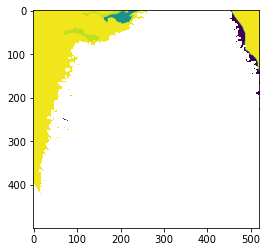

young ice


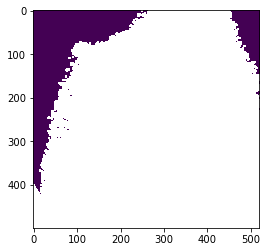

first-year ice


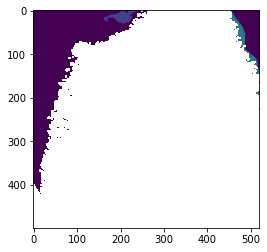

multi-year ice


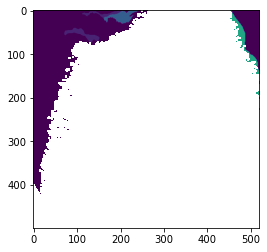

In [9]:
ifiles = sorted(glob.glob('*.nc'))
stp = 20

dir_ = "D:/training/reconstructs_folder"
ifiles_recon = glob.glob(dir_+'/*.npz')
# print(ifiles_recon)
# print(np.load(ifiles_recon[0]).files)
for i in range(len(ifiles)):
    #print(ifile)
    ifile = ifiles[i]
    ds = nc.Dataset(ifile)
    n,p=ds['nersc_sar_secondary'].shape
    sar2 = ds['nersc_sar_secondary'][::stp, ::stp]
    ic = ds['polygon_icechart'][::stp, ::stp]
    
    n,p= ic.shape
    
    #construction of the 3D array that will be filled
    en_values_array=np.zeros((n,p,4))+np.nan
    
    map_id_to_variable_values=dict()
    for id_and_corresponding_variable_values in ds['polygon_codes'][1:]:
        id_val_splitted = id_and_corresponding_variable_values.split(";")
        #print(id_val_splitted)
        [ct, ca, sa, fa, cb, sb, fb, cc, sc, fc] = list(map(int, id_val_splitted[1:11]))
        #result of the one-hot encoding method 
#         result = one_hot_m1(ct,ca,sa,fa,cb,sb,fb,cc,sc,fc)
        ## if you want the method with the concentration uncomment the following line 
        result = one_hot_m2(ct,ca,sa,fa,cb,sb,fb,cc,sc)

        #Filling the dictionnary
        map_id_to_variable_values.update({int(id_val_splitted[0]): result})
        #print("----- input \n",ct,ca,sa,fa,cb,sb,fb,cc,sc, "\n-----output \n",result,"\n")
        print("----- input \n",id_val_splitted, "\n-----output \n",result,"\n")
        
    
    
    for id_value, variable_belong_to_id in map_id_to_variable_values.items():
        # each loop changes all locations of values_array (that have the very
        # 'id_value') to its corresponding value inside 'variable_belong_to_id'
               
        #Filling the 3D array
        en_values_array[ic == id_value, :] =np.array(variable_belong_to_id)
    
    #Showing the different layers of the array
    ice_types = ["open water", "young ice", "first-year ice", "multi-year ice"]
    print(ifile)
    for i in range(4):
        print(ice_types[i])
        plt.imshow(en_values_array[:,:,i], clim = [0,1])
        plt.show()